**Estudando activation functions**

Para calcular o valor de um neurônio, nós fazemos aquele cálculo:  inputs * weights + bias

Com isso nós conseguimos um valor para um neurônio

Entretanto, isso não é suficiente pois a rede não irá se adequar a problemas não lineares

ver animações do começo do video 5 da playlist

Por isso, após aquele cálculo nós ainda passamos uma função de ativação pra cada neurônio

**ReLU**

In [ ]:
#Nós iremos usar a função ReLU para todos os neurônios nas camadas ocultas
#A função ReLU retorna 0 pra valores negativos e se for >= 0, irá retornar o próprio valor

import numpy as np

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)  #essa função retorna o maior valor entre os 2 valores passados
                                        #se o inputs for negativo, o maior valor vai ser 0, então retorna 0
                                        #se o inputs for maior q 0, vai retornar o valor do input

Na camada de saída nós não iremos usar a ReLU 

um dos motivos é q ela não permite uma diferenciação de números negativos já que todos retornam 0.

isso gera uma falta de informação para os otimizadores, qnd eles precisarem fazer o ajuste de pesos.

uma alternativa é a softmax, principalmente pra previsoes de multiplas classes

outra é a sigmoide pra previsoes binarias

**Softmax**

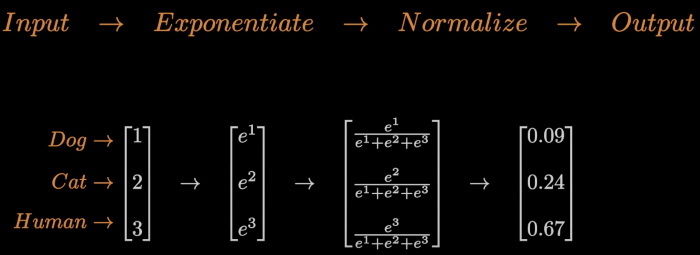

In [ ]:
import math

layer_outputs = [4.8,1.21,2.385] 

E = math.e

exp_values = []

for output in layer_outputs:
  exp_values.append(E**output)

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
  norm_values.append (value / norm_base)

print(norm_values)

In [ ]:
import math
import numpy as np

layer_outputs = [4.8,1.21,2.385]

E = math.e

exp_values = np.exp(layer_outputs)  #essa função do np simplifica o que foi feito na celula acima
norm_values = exp_values / np.sum(exp_values)

print(norm_values)

In [ ]:
import numpy as np

layer_outputs = [[4.8,1.21,2.385],      #dados em batches
                 [9.9,-1.81,0.2],
                 [1.41,1.051,0.026]]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)  #esses params sao usados para nao dar problema de shape

print(norm_values)

In [ ]:
#resumindo em uma classe

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) #subtrai o maximo valor pra evitar overflow
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities